In [1]:
from sklearn.decomposition import PCA

In [2]:
from codebase.utils import load_model_by_name
from codebase.utils import generate_individual_set_loader
from codebase.utils import get_mean_variance
from codebase import utils as ut
from codebase.models.hkvae import HKVAE
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import numpy as np
import torchvision
import argparse

In [3]:
parser = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
parser.add_argument('--gw',             type=int, default=1,        help="Weight on the generative terms")
parser.add_argument('--cw',             type=int, default=50,      help="Weight on the class term")
parser.add_argument('--recw',            type=int, default=10,        help="Weight on the generative terms")
parser.add_argument('--kl_xy_xw',        type=int, default=10,       help="Weight on the class term")
parser.add_argument('--kl_xy_yw',        type=int, default=30,       help="Weight on the generative terms")
parser.add_argument('--iter_max',       type=int, default=10000,    help="Number of training iterations")
parser.add_argument('--iter_save',      type=int, default=5000,    help="Save model every n iterations")
parser.add_argument('--run',            type=int, default=0,        help="Run ID. In case you want to run replicates")
parser.add_argument('--train',          type=int, default=1,        help="Flag for training")
args = parser.parse_known_args()[0]

In [40]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')


../checkpoints\./HKVAE_FASHIONMNIST_CNN/model=hkvae_rec_step=010_gw=001_cw=050_kl_xy_xw=025_kl_xy_yw=050_recw=010_run=0000\model-10000.pt
Loaded from ../checkpoints\./HKVAE_FASHIONMNIST_CNN/model=hkvae_rec_step=010_gw=001_cw=050_kl_xy_xw=025_kl_xy_yw=050_recw=010_run=0000\model-10000.pt


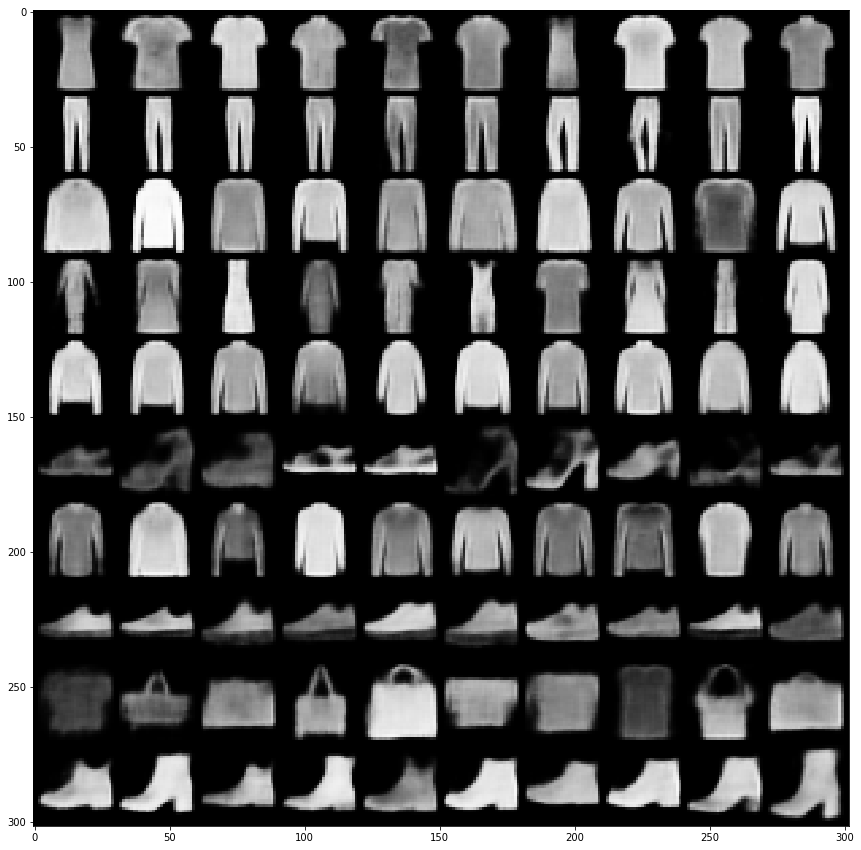

In [43]:
train_set = datasets.FashionMNIST(
    root='../FASHIONMNIST-data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

test_set = datasets.MNIST(
    root='../FASHIONMNIST-data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

CNN = True

train_loader, labeled_subset, test_set = ut.get_mnist_data(device, train_set, test_set,
                                                           use_test_subset=True,
                                                           CNN=CNN)

model_name = "./HKVAE_FASHIONMNIST_CNN/model=hkvae_rec_step=010_gw=001_cw=050_kl_xy_xw=025_kl_xy_yw=050_recw=010_run=0000"

hkvae = HKVAE(
    rec_weight=args.recw,
    kl_xy_x_weight=args.kl_xy_xw,
    kl_xy_y_weight=args.kl_xy_yw,
    gen_weight=args.gw,
    class_weight=args.cw,
    name=model_name,
    CNN=CNN).to(device)
load_model_by_name(hkvae, 10000)

labels = np.repeat(np.arange(10), 10)
y = torch.tensor(np.eye(10)[labels].reshape(-1, 10)).float().to(device)
image = hkvae.sample_x_given_y(y) * 255
image = image.int()
grid = torchvision.utils.make_grid(image.reshape(-1, 1, 28, 28), nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

../checkpoints\./HKVAE_FASHIONMNIST/model=hkvae_rec_step=010_gw=001_cw=050_kl_xy_xw=025_kl_xy_yw=050_recw=010_run=0000\model-10000.pt
Loaded from ../checkpoints\./HKVAE_FASHIONMNIST/model=hkvae_rec_step=010_gw=001_cw=050_kl_xy_xw=025_kl_xy_yw=050_recw=010_run=0000\model-10000.pt


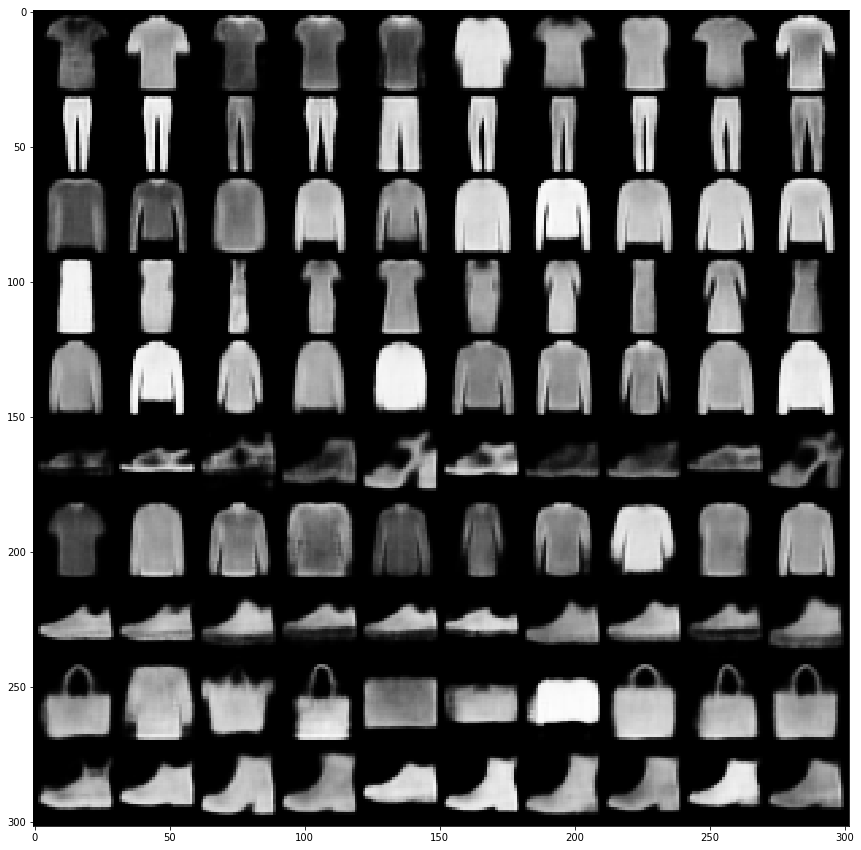

In [44]:
train_set = datasets.FashionMNIST(
    root='../FASHIONMNIST-data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

test_set = datasets.MNIST(
    root='../FASHIONMNIST-data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

CNN = False

train_loader, labeled_subset, test_set = ut.get_mnist_data(device, train_set, test_set,
                                                           use_test_subset=True,
                                                           CNN=CNN)

model_name = "./HKVAE_FASHIONMNIST/model=hkvae_rec_step=010_gw=001_cw=050_kl_xy_xw=025_kl_xy_yw=050_recw=010_run=0000"

hkvae = HKVAE(
    rec_weight=args.recw,
    kl_xy_x_weight=args.kl_xy_xw,
    kl_xy_y_weight=args.kl_xy_yw,
    gen_weight=args.gw,
    class_weight=args.cw,
    name=model_name,
    CNN=CNN).to(device)
load_model_by_name(hkvae, 10000)

labels = np.repeat(np.arange(10), 10)
y = torch.tensor(np.eye(10)[labels].reshape(-1, 10)).float().to(device)
image = hkvae.sample_x_given_y(y) * 255
image = image.int()
grid = torchvision.utils.make_grid(image.reshape(-1, 1, 28, 28), nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

../checkpoints\./HKVAE_MNIST_CNN/model=hkvae_rec_step=010_gw=001_cw=050_kl_xy_xw=025_kl_xy_yw=050_recw=010_run=0000\model-10000.pt
Loaded from ../checkpoints\./HKVAE_MNIST_CNN/model=hkvae_rec_step=010_gw=001_cw=050_kl_xy_xw=025_kl_xy_yw=050_recw=010_run=0000\model-10000.pt


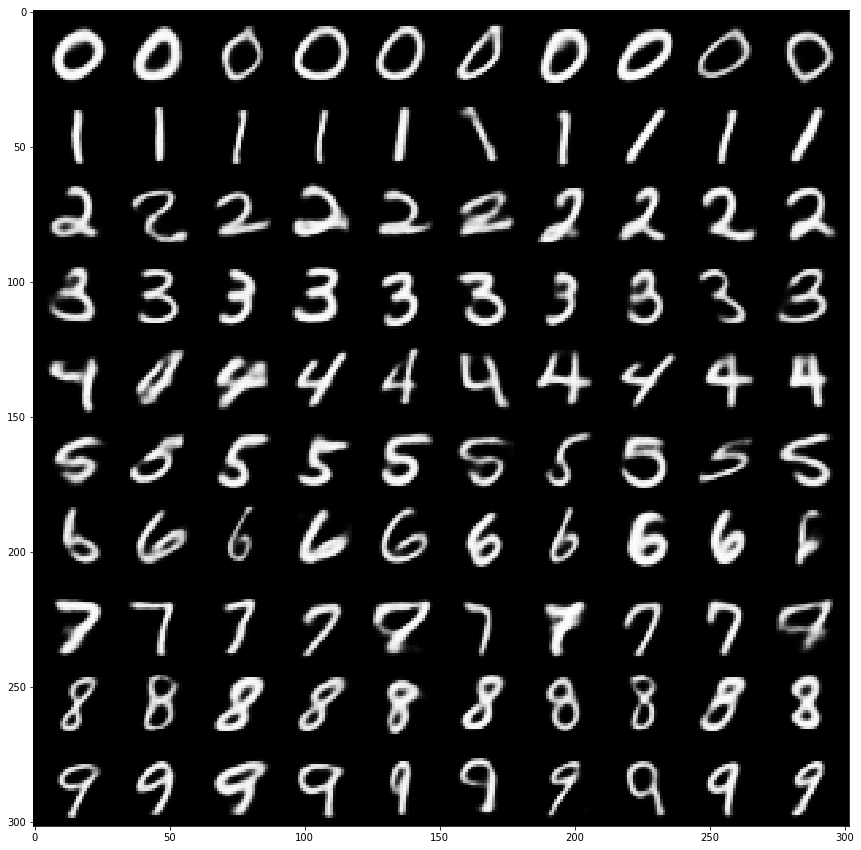

In [45]:
train_set = datasets.FashionMNIST(
    root='../MNIST-data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

test_set = datasets.MNIST(
    root='../MNIST-data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

CNN = True

train_loader, labeled_subset, test_set = ut.get_mnist_data(device, train_set, test_set,
                                                           use_test_subset=True,
                                                           CNN=CNN)

model_name = "./HKVAE_MNIST_CNN/model=hkvae_rec_step=010_gw=001_cw=050_kl_xy_xw=025_kl_xy_yw=050_recw=010_run=0000"

hkvae = HKVAE(
    rec_weight=args.recw,
    kl_xy_x_weight=args.kl_xy_xw,
    kl_xy_y_weight=args.kl_xy_yw,
    gen_weight=args.gw,
    class_weight=args.cw,
    name=model_name,
    CNN=CNN).to(device)
load_model_by_name(hkvae, 10000)

labels = np.repeat(np.arange(10), 10)
y = torch.tensor(np.eye(10)[labels].reshape(-1, 10)).float().to(device)
image = hkvae.sample_x_given_y(y) * 255
image = image.int()
grid = torchvision.utils.make_grid(image.reshape(-1, 1, 28, 28), nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

../checkpoints\./HKVAE_MNIST/model=hkvae_rec_step=010_gw=001_cw=050_kl_xy_xw=025_kl_xy_yw=050_recw=010_run=0000\model-10000.pt
Loaded from ../checkpoints\./HKVAE_MNIST/model=hkvae_rec_step=010_gw=001_cw=050_kl_xy_xw=025_kl_xy_yw=050_recw=010_run=0000\model-10000.pt


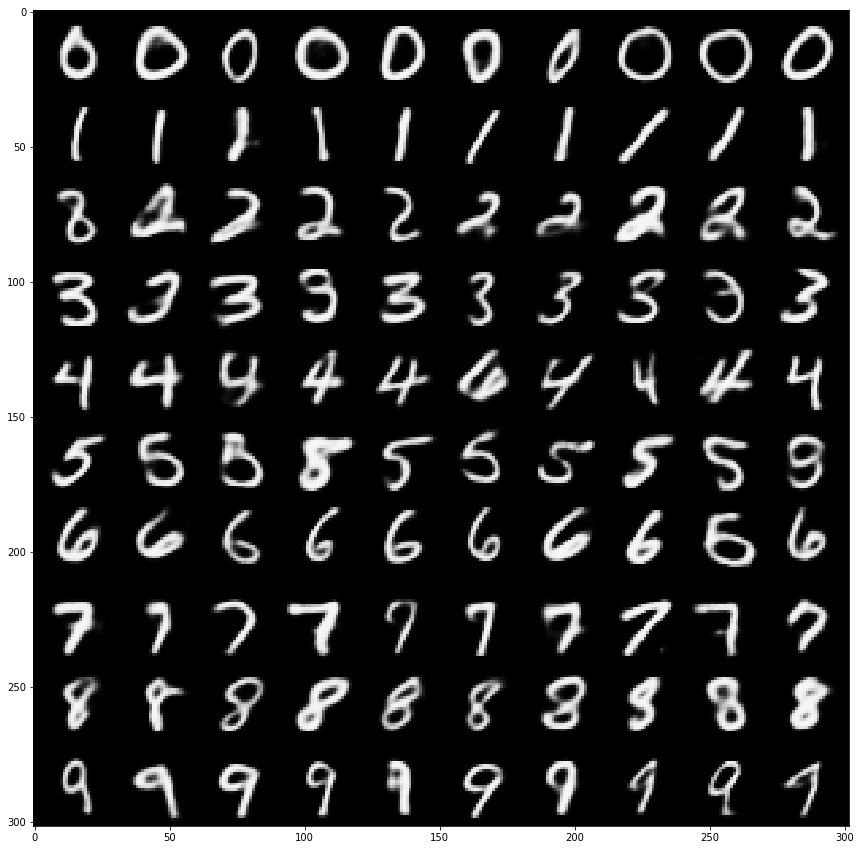

In [46]:
train_set = datasets.FashionMNIST(
    root='../MNIST-data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

test_set = datasets.MNIST(
    root='../MNIST-data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

CNN = False

train_loader, labeled_subset, test_set = ut.get_mnist_data(device, train_set, test_set,
                                                           use_test_subset=True,
                                                           CNN=CNN)

model_name = "./HKVAE_MNIST/model=hkvae_rec_step=010_gw=001_cw=050_kl_xy_xw=025_kl_xy_yw=050_recw=010_run=0000"

hkvae = HKVAE(
    rec_weight=args.recw,
    kl_xy_x_weight=args.kl_xy_xw,
    kl_xy_y_weight=args.kl_xy_yw,
    gen_weight=args.gw,
    class_weight=args.cw,
    name=model_name,
    CNN=CNN).to(device)
load_model_by_name(hkvae, 10000)

labels = np.repeat(np.arange(10), 10)
y = torch.tensor(np.eye(10)[labels].reshape(-1, 10)).float().to(device)
image = hkvae.sample_x_given_y(y) * 255
image = image.int()
grid = torchvision.utils.make_grid(image.reshape(-1, 1, 28, 28), nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

In [115]:
# xl, yl = test_set
# yl = torch.tensor(np.eye(10)[yl]).float().to(device)
# test_set = (xl, yl)

In [116]:
ut.evaluate_classifier_HK(hkvae, test_set)
ut.evaluate_lower_bound_HK(hkvae, test_set)

********************************************************************************
CLASSIFICATION EVALUATION ON ENTIRE TEST SET
********************************************************************************


RuntimeError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

MNIST
- CNN=False
    - rec_weight = 10
        - Test set classification accuracy: 0.9750000238418579
        - KL_XY_X: 1.6531460285186768. KL_XY_Y: 16.8985538482666. Rec: 75.05429077148438
    - rec_weight = 0
        - Test set classification accuracy: 0.9660000205039978
        - KL_XY_X: 1.590492606163025. KL_XY_Y: 14.116113662719727. Rec: 81.0675048828125
- CNN=True
    - Test set classification accuracy: 0.9854999780654907
    - KL_XY_X: 2.277970790863037. KL_XY_Y: 16.701488494873047. Rec: 74.6834106445312



FASHIONMNIST
- CNN=False
    - Test set classification accuracy: 0.8389999866485596
    - KL_XY_X: 1.1017214059829712. KL_XY_Y: 11.208268165588379. Rec: 223.61557006835938
- CNN=True
    - Test set classification accuracy: 0.8276000022888184
    - KL_XY_X: 1.204930305480957. KL_XY_Y: 11.101201057434082. Rec: 223.65084838867188
